# 📑PdfPlumber Text Extraction Tool - Test On Arabic📑

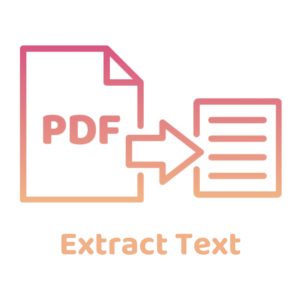

**Goal:** We want to extract the text from a PDF and compare that against a clean file of the same text for 5 pdf files, in order to benchmark pdfplumber with Arabic language in python.

## PDFPlumber

**What is PDFPlumber?**

Plumb a PDF for detailed information about each text character, rectangle, and line. Plus: Table extraction and visual debugging.

Works best on machine-generated, rather than scanned, PDFs. Built on [`pdfminer.six`](https://github.com/pdfminer/pdfminer.six).


[![Version](https://img.shields.io/pypi/v/pdfplumber.svg)](https://pypi.python.org/pypi/pdfplumber) [![Github](https://img.shields.io/badge/Github_Source-gray)](https://github.com/jsvine/pdfplumber/)

**Task Description:**

Your task is to evaluate the PDFPlumber PDF text extraction tool by running it on a provided sample PDF file. Your evaluation should include a comprehensive analysis of the tool, highlighting its strengths and weaknesses.

**What to Submit:**

1. **Text Files:** Submit text files containing the extracted text from the PDF. Each text file's name should match the corresponding PDF file's name. These text files will contribute to a matrix calculation to assess the tool's performance. Optimize your code to maximize your score in the evaluation matrix.

2. **Documented Analysis:** Provide a detailed analysis documenting your observations and conclusions based on your exploration and evaluation of the PDFPlumber tool.

3. **Code:** Clone the provided GitHub repository containing the code template for text extraction. Add your code to the repository, commit the changes, and push them to the remote repository.



**[Sample Text](https://github.com/SMSM-AI/AMUN-RAG/tree/main/Sample%20Text)**

Ensure that your submission is well-organized and adheres to the provided guidelines.


## ⬇️Install Requirements⬇️

In [1]:
!pip install pdfplumber
!pip install python-bidi
!pip install Levenshtein
!pip install arabic-reshaper
!pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 468.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.9 MB/s eta 0:00:00


## 📦Import Packages📦

In [2]:
import pdfplumber
import pandas as pd
from bidi import algorithm
import bidi.algorithm as bidi
import pyarabic.araby as araby
from arabic_reshaper import reshape
import datetime

import Levenshtein

import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

## 1️⃣Dealing with the first pdf file - Test (1).pdf1️⃣

In [43]:
# read the pdf using pdfplumber
reader = pdfplumber.open("Test (1).pdf")

In [44]:
# see the number of pages in pdf file
len(reader.pages)

5

In [45]:
time_file = []

In [46]:
# save the extracted text from pages in dictionary
# to see how much time the tool took to extract the text from the pdf file

output_text_first = ''

now = datetime.datetime.now()

pages = {}
for i in range(len(reader.pages)):
    page = reader.pages[i]
    pages[f'page_{i}'] = page.extract_text()

    output_text_first += pages[f'page_{i}']

stop = datetime.datetime.now()

time_file.append(stop - now) # save the time for later use

def save_extracted_processed(output_text):
    f = open('Before/' + 'Test (1)_before.txt', 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

save_extracted_processed(output_text_first)

In [47]:
# print the extracted text in each page
for page in range(len(reader.pages)):
    print(f'page {page} content is : \n \n', pages[f'page_{page}'], '\n')

page 0 content is : 
 
 ( دﻠﺑﻟا لھأ ءﺎﺿوﺿ ﻰﻠﻋرادﻟا ةدﻣﻌﻟا لﺧدﯾ )
دﻠﺑﻟا ﻰﺷﻣا فرﺎﻋ شﻣ .. ىد دﻠﺑﻟا ﻰﻓ ﺞﻧرﺧ ةدﻣﻋ ... وھو تﻧا ﻰﻧﺑا ﺎﯾ سﺑ .. ﷲ ﻻا ﮫﻟا اااﻻ : ةدﻣﻌﻟا
صﻟﺎﺧ ىد
راااﺎﻧ .. ةدﻣﻋ ﺎﯾ ﺎﯾﻓ ىرﺟﺗﺑ رااﺎﻧ ... ﻰﻧﻘﺣﻟا ... ةدﻣﻌﻟا ﺎﺑا ﺎﯾ ﻰﻧﻘﺣﻟا : ىدﯾﻌﺟ
ﻻو ﺎﯾ لﺻﺣ ﻰﻠﻟا سﺑ ﮫﯾا ... ىدﯾﻌﺟ ﺎﯾ داو ﺎﯾ رﯾﺧ : ةدﻣﻌﻟا
ﻰﺗاﺎﺗرﻣ ... ةدﻣﻌﻟا ﺎﺑا ﺎﯾ نﯾﻧﺗﻹا ﻰﺗﺎﺗارﻣ ... ةدﻣﻌﻟا ﺎﺑا ﺎﯾ قﻠطازﯾﺎﻋ ﺎﻧا : ىدﯾﻌﺟ
ىدﯾﻌﺟ ﺎﯾ داو ﺎﯾ مﮭﻟﺎﻣ : ةدﻣﻌﻟا
ﺎﯾﻓ برﺿ اوﻠﻣﻛﯾ نﯾزﯾﺎﻋ و ﺎﯾارو ىرﺟ نﯾﯾﺎﺟ : ىدﯾﻌﺟ
لﺻﺣ ﻰﻠﻟا سﺑ ﮫﯾا : ةدﻣﻌﻟا
تﺑرﺷو .. ﻰﻋﺎﺗﺑ ﻰﺗ سﯾﺎﻧﻟا تدﺧا ﺎﻣا دﻌﺑ موﻧﻟا نﻣ تﻣﻗ ﺎﻧا... ىدﯾﺳ ﺎﯾ صﺑ ... كﻠﯾﻛﺣھ ﺎﻧا : ىدﯾﻌﺟ
ﺔﻛﺳﺎﻣ ةدﺣاو ... ﺔﻧﯾﻛﺳو ﺎﯾر ىز نﯾﻧﺗﻹا ﺎﻣھ ﻰﻠﻧﯾﺎﺟ مﮭﺗﯾﻘﻟ ... موﯾ لﻛ عﺎﺗﺑ نﺑﻠﻟا صﻼﺑ
بوووھ و ... شﺎﺷر ﻊﻓدﻣ ﺔﻠﯾﺎﺷ ﺎﮭﻧﻛا ﻻو رﯾرﺳﻟا ﺔﺗوﻛﺳ ﺔﻠﯾﺎﺷ ﺔﯾﻧﺎﺗﻟا و ﺦﺑطﻣﻟا ﺔﺷﻘﻣ
ﻰﺧوﻔﻧ قوﻓ غدﻏدﺗﻣ شﻣﻟا صﻼﺑ تﯾﻘﻟ
مﮭﺗﺎﻧﺑ و مھ مﮭﯾﻔﻛﻣ شﻣ تﻧا وھ .. ﻻو ﺎﯾ سﺑ ﮫﯾﻟ ... ﷲ ﷲ ﷲ : ةدﻣﻌﻟا
ﷲ دﻣﺣﻟا .. ةدﻣﻌﻟا ﺎﺑﺎﯾ ﷲ دﻣﺣﻟا : ىدﯾﻌﺟ
هدﻛ شﻣ كﯾﻠﻋ ةدوﺳ ﺔﻠﻣﺎﻋ لﻣﺎﻋ دﯾﻛا تﻧا ﻰﻘﺑﯾ : ةدﻣﻌﻟا
ﻰﻋوا سﺑ كﻟوﻘھ ﺎﻧا.. ةدﻣﻌﻟا ﺎﺑا ﺎﯾ تﺎﺳﻧآ ﮫﺳﻟ و نﯾﻧﺗا زوﺟﺗﻣ ﺎﻧاد ... ةدﻣﻌﻟا ﺎﺑﺎﯾ ﮫﯾ

In [48]:
# process the extracted text

path = "Test (1).pdf" # path to file

# fucntion to save the extracted text in a text file
def save_extracted_text(path, output_text):
    f = open('After/' + path, 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

# to solve the problem of fliping the text.
# this solution took from my colleague hazem_33 https://discord.com/channels/1219261069005160468/1222950170916950129/1222973505411485726
def process(path):

    with pdfplumber.open(path) as pdf:

        now = datetime.datetime.now()

        # iterate over each page
        text=[]
        for ind, page in enumerate(pdf.pages):
            # extract and reverse text
            text.append(algorithm.get_display(
                page.extract_text(keep_blank_chars=True))
            )

        stop = datetime.datetime.now()

        time_processed = stop - now

    return "\n".join(text), time_processed

# print the output after applying read_pdf function on all files
output_first, time_first_processed = process(path)
print('Time for processing: ', time_first_processed, '\n', '\nOutput text after processing: \n \n', output_first)
save_extracted_text(path.replace('.pdf', '.txt') , output_first)

Time for processing:  0:00:01.294513 
 
Output text after processing: 
 
 ( ﯾدﺧل اﻟﻌﻣدة اﻟدارﻋﻠﻰ ﺿوﺿﺎء أھل اﻟﺑﻠد )
اﻟﻌﻣدة : ﻻااا اﻟﮫ اﻻ ﷲ .. ﺑس ﯾﺎ اﺑﻧﻰ اﻧت وھو ... ﻋﻣدة ﺧرﻧﺞ ﻓﻰ اﻟﺑﻠد دى .. ﻣش ﻋﺎرف اﻣﺷﻰ اﻟﺑﻠد
دى ﺧﺎﻟص
ﺟﻌﯾدى : اﻟﺣﻘﻧﻰ ﯾﺎ اﺑﺎ اﻟﻌﻣدة ... اﻟﺣﻘﻧﻰ ... ﻧﺎاار ﺑﺗﺟرى ﻓﯾﺎ ﯾﺎ ﻋﻣدة .. ﻧﺎااار
اﻟﻌﻣدة : ﺧﯾر ﯾﺎ واد ﯾﺎ ﺟﻌﯾدى ... اﯾﮫ ﺑس اﻟﻠﻰ ﺣﺻل ﯾﺎ وﻻ
ﺟﻌﯾدى : اﻧﺎ ﻋﺎﯾزاطﻠق ﯾﺎ اﺑﺎ اﻟﻌﻣدة ... ﻣراﺗﺎﺗﻰ اﻹﺗﻧﯾن ﯾﺎ اﺑﺎ اﻟﻌﻣدة ... ﻣرﺗﺎاﺗﻰ
اﻟﻌﻣدة : ﻣﺎﻟﮭم ﯾﺎ واد ﯾﺎ ﺟﻌﯾدى
ﺟﻌﯾدى : ﺟﺎﯾﯾن ﺟرى وراﯾﺎ و ﻋﺎﯾزﯾن ﯾﻛﻣﻠوا ﺿرب ﻓﯾﺎ
اﻟﻌﻣدة : اﯾﮫ ﺑس اﻟﻠﻰ ﺣﺻل
ﺟﻌﯾدى : اﻧﺎ ھﺣﻛﯾﻠك ... ﺑص ﯾﺎ ﺳﯾدى ...اﻧﺎ ﻗﻣت ﻣن اﻟﻧوم ﺑﻌد اﻣﺎ اﺧدت اﻟﻧﺎﯾس ﺗﻰ ﺑﺗﺎﻋﻰ .. وﺷرﺑت
ﺑﻼص اﻟﻠﺑن ﺑﺗﺎع ﻛل ﯾوم ... ﻟﻘﯾﺗﮭم ﺟﺎﯾﻧﻠﻰ ھﻣﺎ اﻹﺗﻧﯾن زى رﯾﺎ وﺳﻛﯾﻧﺔ ... واﺣدة ﻣﺎﺳﻛﺔ
ﻣﻘﺷﺔ اﻟﻣطﺑﺦ و اﻟﺗﺎﻧﯾﺔ ﺷﺎﯾﻠﺔ ﺳﻛوﺗﺔ اﻟﺳرﯾر وﻻ اﻛﻧﮭﺎ ﺷﺎﯾﻠﺔ ﻣدﻓﻊ رﺷﺎش ... و ھوووب
ﻟﻘﯾت ﺑﻼص اﻟﻣش ﻣﺗدﻏدغ ﻓوق ﻧﻔوﺧﻰ
اﻟﻌﻣدة : ﷲ ﷲ ﷲ ... ﻟﯾﮫ ﺑس ﯾﺎ وﻻ .. ھو اﻧت ﻣش ﻣﻛﻔﯾﮭم ھم و ﺑﻧﺎﺗﮭم
ﺟﻌﯾدى : اﻟﺣﻣد ﷲ ﯾﺎﺑﺎ اﻟﻌﻣدة .. اﻟﺣﻣد ﷲ
اﻟﻌﻣدة : ﯾﺑﻘﻰ اﻧت اﻛﯾد ﻋﺎﻣل ﻋﺎﻣﻠﺔ ﺳودة ﻋﻠﯾك ﻣش ﻛده
ﺟﻌﯾدى : ﻋﺎﻣﻠﺔ اﯾﮫ ﯾﺎﺑﺎ اﻟﻌﻣدة .

In [49]:
f = open('Test (1) _ baseline.txt', "r", encoding="utf8")
original_first = f.read()

base_first_before = Levenshtein.distance(original_first, output_text_first)
base_first_after = Levenshtein.distance(original_first, output_first)

base_first_before, base_first_after

(5682, 3332)

_______________

## 2️⃣Dealing with the Second pdf file - Test (2).pdf2️⃣

In [50]:
# read the pdf using pdfplumber
reader = pdfplumber.open("Test (2).pdf")

In [51]:
# see the number of pages in pdf file
len(reader.pages)

9

In [52]:
# save the extracted text from pages in dictionary
# to see how much time the tool took to extract the text from the pdf file

output_text_second = ''

now = datetime.datetime.now()

pages = {}
for i in range(len(reader.pages)):
    page = reader.pages[i]
    pages[f'page_{i}'] = page.extract_text()

    output_text_second += pages[f'page_{i}']

stop = datetime.datetime.now()

time_file.append(stop - now) # save the time for later use

def save_extracted_processed(output_text):
    f = open('Before/' + 'Test (2)_before.txt', 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

save_extracted_processed(output_text_second)

In [53]:
# print the extracted text in each page
for page in range(len(reader.pages)):
    print(f'page {page} content is : \n \n', pages[f'page_{page}'], '\n')

page 0 content is : 
 
 لاماك بدلأا ةلماش ةمهم ةلئسأ
ريوطتلا ليج
؟ رعشلا ريوطت يف يقوش رود ام : 1س
ًايملاسإ ًاهاجتا هرعش في هجتا - يرعشلا حرسملل هتداير - ةيرصعلا تازجنملا وحن هجتا - خيراتلا لىإ هجتاو حيدملا كرت : رعشلا ريوطت في يقوش رود : ـج
. حضو . يبرعلا رعشلا عيوطت يف زراب رود مرحم دمحلأ ناك : 2س.
. " ةيملاسلإا ةذايللإا " ضعبلا اهيمسي يتلا ملاسلإا دجم ناويد فلأف يسامحلا يخيراتلا صصقلل يبرعلا رعشلا عوّ ط : مرحم دمحأ رود : ـج
؟ هرصع تازجنم نم يقوش فقوم ام
: لينلا يداو في ثداوحلا رابك ةديصق علطم في يقوش دمحأ لوقي نفسلا فصول ةقانلا ثيدح نع فرصناو ةيرصعلا تازجنملا فصو
. ءاجرلا لقت نمب اهادحو ءاملا اهاوتحاو كلفلا تمه
. يدورابلا ذيملات ىلع تابسانملا رعش ىغط : للع
. مهرصع اياضقب مهلاغشنلا اعبت
. حضو ) مهرصع تلاكشم نم فقوم يدورابلا ذيملاتل ناك (
وأ ، ةفاحصلا ةيرحو تاعوبطملا نوناق وأ ؟، روتسدلاب لصتي امم ، يداصتقلااو يعامتجلااو يسايسلا حلاصلإا بناوج نمو ، مكحلا رصقلا نم مهفقوم
ةفاقثلا في ةايحلا رييغت مهلابقتسا وأ ةأرملا ريرحتل نيمأ مساق ةوعد وأ ةيرصملا ةعماجلا ءاشنإ وأ اطابقأو نيملسم نيملسملا

In [54]:
# process the extracted text

path = "Test (2).pdf" # path to file

# fucntion to save the extracted text in a text file
def save_extracted_text(path, output_text):
    f = open('After/' + path, 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

# to solve the problem of fliping the text.
# this solution took from my colleague hazem_33 https://discord.com/channels/1219261069005160468/1222950170916950129/1222973505411485726
def process(path):

    with pdfplumber.open(path) as pdf:

        now = datetime.datetime.now()

        # iterate over each page
        text=[]
        for ind, page in enumerate(pdf.pages):
            # extract and reverse text
            text.append(algorithm.get_display(
                page.extract_text(keep_blank_chars=True))
            )

        stop = datetime.datetime.now()

        time_processed = stop - now

    return "\n".join(text), time_processed

# print the output after applying read_pdf function on all files
output_second, time_second_processed = process(path)
print('Time for processing: ', time_file[0], '\n', '\nOutput text after processing: \n \n', output_second)
save_extracted_text(path.replace('.pdf', '.txt') , output_second)

Time for processing:  0:00:01.610547 
 
Output text after processing: 
 
 أسئلة مهمة شاملة األدب كامال  
جيل التطوير  
س1 : ما دور شوقي في تطوير الشعر ؟  
جـ : دور شوقي يف تطوير الشعر : ترك المديح واتجه إىل التاريخ - اتجه نحو المنجزات العصرية - ريادته للمسرح الشعري - اتجه يف شعره اتجاهاً إسالمياً 
.س2 : كان ألحمد محرم دور بارز في تطويع الشعر العربي . وضح .  
جـ : دور أحمد محرم : ط ّوع الشعر العربي للقصص التاريخي الحماسي فألف ديوان مجد اإلسالم التي يسميها البعض " اإللياذة اإلسالمية " .  
ما موقف شوقي من منجزات عصره ؟  
وصف المنجزات العصرية وانصرف عن حديث الناقة لوصف السفن يقول أحمد شوقي يف مطلع قصيدة كبار الحوادث يف وادي النيل :  
همت الفلك واحتواها الماء    وحداها بمن تقل الرجاء .  
علل : طغى شعر المناسبات على تالميذ البارودي .  
تبعا النشغالهم بقضايا عصرهم .  
 ) كان لتالميذ البارودي موقف من مشكالت عصرهم ( وضح .  
موقفهم من القصر الحكم ، ومن جوانب اإلصالح السياسي واالجتماعي واالقتصادي ، مما يتصل  بالدستور ،؟ أو قانون المطبوعات وحرية الصحافة ، أو 
تعدد األحزاب أو وحدة المسلمين مسلمين و

In [55]:
f = open('Test (2) _ baseline.txt', "r", encoding="utf8")
original_second = f.read()

base_second_before = Levenshtein.distance(original_second, output_text_second)
base_second_after = Levenshtein.distance(original_second, output_second)

base_second_before, base_second_after

(33227, 4979)



---



## 3️⃣Dealing with the Third pdf file - Test (3).pdf3️⃣

In [56]:
# read the pdf using pdfplumber
reader = pdfplumber.open("Test (3).pdf")

In [57]:
# see the number of pages in pdf file
len(reader.pages)

8

In [58]:
# save the extracted text from pages in dictionary
# to see how much time the tool took to extract the text from the pdf file

output_text_third = ''

now = datetime.datetime.now()

pages = {}
for i in range(len(reader.pages)):
    page = reader.pages[i]
    pages[f'page_{i}'] = page.extract_text()

    output_text_third += pages[f'page_{i}']

stop = datetime.datetime.now()

time_file.append(stop - now) # save the time for later use

def save_extracted_processed(output_text):
    f = open('Before/' + 'Test (3)_before.txt', 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

save_extracted_processed(output_text_third)

In [59]:
# process the extracted text

path = "Test (3).pdf" # path to file

# fucntion to save the extracted text in a text file
def save_extracted_text(path, output_text):
    f = open('After/' + path, 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

# to solve the problem of fliping the text.
# this solution took from my colleague hazem_33 https://discord.com/channels/1219261069005160468/1222950170916950129/1222973505411485726
def process(path):

    with pdfplumber.open(path) as pdf:

        now = datetime.datetime.now()

        # iterate over each page
        text=[]
        for ind, page in enumerate(pdf.pages):
            # extract and reverse text
            text.append(algorithm.get_display(
                page.extract_text(keep_blank_chars=True))
            )

        stop = datetime.datetime.now()

        time_processed = stop - now

    return "\n".join(text), time_processed

# print the output after applying read_pdf function on all files
output_third, time_third_processed = process(path)
print('Time for processing: ', time_third_processed, '\n', '\nOutput text after processing: \n \n', output_third)
save_extracted_text(path.replace('.pdf', '.txt') , output_third)

Time for processing:  0:00:01.587939 
 
Output text after processing: 
 
 اﻟﺜﻌﻠﺐ اﻟﺬي ﺧﺪع ﻧﻔﺴﮫ ....... ( ﻣﺴﺮﺣﯿﺔ ﻗﺼﯿﺮة ﻟﻸطﻔﺎل )
ﺗﺄﻟﯿﻒ :أﺣﻤﺪ اﺳﻤﺎﻋﯿﻞ اﺳﻤﺎﻋﯿﻞ
-----------------------------------------------------------------
(اﻟﻤﻨﻈﺮ ﻋﺒﺎرة ﻋﻦ ﺗﻞ ﯾﺸﺮف ﻋﻠﻰ ﺳﮭﻞ أﺧﻀﺮ رﺣﺐ , ﻓﻮق اﻟﺘﻞ ﺻﺨﺮة
ﻛﺒﯿﺮةﯾﺨﺘﺒﺊ ﺧﻠﻔﮭﺎ اﻟﺜﻌﻠﺐ وھﻮ ﯾﺴﺘﺮق اﻟﻨﻈﺮات إﻟﻰ اﻟﺴﮭﻞ ,ﻟﺤﻈﺎت ﯾﺪﺧﻞ ذﺋﺐ ھﺰﯾﻞ
اﻟﺠﺴﻢ)
اﻟﺬﺋﺐ : ﻋﻮوو..
اﻟﺜﻌﻠﺐ: (ﯾﺠﻔﻞ) أھﺬا أﻧﺖ أﯾﮭﺎ اﻟﺬﺋﺐ اﻟﻌﺠﻮز ؟
اﻟﺬﺋﺐ : ھﻞ أﺧﻔﺘﻚ ؟
اﻟﺜﻌﻠﺐ: (ﻣﻜﺎﺑﺮا ) ﻻ.ﻻ. ﻟﻢ أﺧﻒ .
اﻟﺬﺋﺐ : ﻟﻜﻨﻚ ﺟﻔﻠﺖ , و ﺷﺤﺐ ﻟﻮﻧﻚ .
اﻟﺜﻌﻠﺐ: ظﻨﻨﺘﻚ ذﺋﺒﺎً أﺧﺮ .
اﻟﺬﺋﺐ : ذﺋﺒﺎً ﺷﺎﺑﺎً وﻗﻮﯾﺎً ؟ أﻟﯿﺲ ﻛﺬاﻟﻚ؟
اﻟﺜﻌﻠﺐ: (ﺑﻀﯿﻖ ) أف أﯾﮭﺎ اﻟﻌﺠﻮز , دﻋﻨﻲ أﻧﻔﺬ اﻟﻤﮭﻤﺔ اﻟﺘﻲ أﻣﺮﻧﻲ ﺑﮭﺎ ﻣﻠﻚ
اﻟﻐﺎﺑﺔ .(ﯾﻌﻮد اﻟﺜﻌﻠﺐ إﻟﻰ ﻣﺮاﻗﺒﺔ اﻟﺴﮭﻞ )
اﻟﺬﺋﺐ : ( ﺑﺎﺳﺘﻐﺮاب ) ﻣﺎذا ﻗﻠﺖ ،ﻣﮭﻤﺔ ؟!ﻻ ﺷﻚ أﻧﮭﺎ ﻣﮭﻤﺔ ﺧﻄﺮة .
اﻟﺜﻌﻠﺐ : (ﺑﻐﺮور ) ﻧﻌﻢ . ھﻲ ﻛﺬاﻟﻚ .
اﻟﺬﺋﺐ : وﻣﺎ ھﻲ ؟
اﻟﺜﻌﻠﺐ : ھﺬا ﺳﺮ.
اﻟﺬﺋﺐ : وھﻞ ﺗﻮﺟﺪ أﺳﺮار ﺑﯿﻦ اﻷﺻﺪﻗﺎء ؟
اﻟﺜﻌﻠﺐ : ( وھﻮ ﯾﺮاﻗﺐ . ﯾﺨﺎطﺐ ﻧﻔﺴﮫ ) أوﺷﻜﺖ اﻟﺸﻤﺲ ﻋﻠﻰ اﻟﻤﻐﯿﺐ , وﻟﻢ أﺷﺎھﺪ
ﺟﻤﻼً أو ﺣﻤﻼً. أف .
اﻟﺬﺋﺐ : اﻵن ﻓﮭﻤﺖ .
اﻟﺜﻌﻠﺐ: ﻣﺎذا ﻓﮭﻤﺖ ؟
اﻟﺬﺋﺐ : إﻧﻚ ﺗﻨﺘﻈﺮ ﻓﺮﯾﺴﺔ ﻣﺎ 

In [60]:
f = open('Test (3) _ baseline.txt', "r", encoding="utf8")
original_third = f.read()

base_third_before = Levenshtein.distance(original_third, output_text_third)
base_third_after = Levenshtein.distance(original_third, output_third)

base_third_before, base_third_after

(7472, 4983)



---



## 4️⃣Dealing with the Fourth pdf file - Test (4).pdf4️⃣

In [61]:
# read the pdf using pdfplumber
reader = pdfplumber.open("Test (4).pdf")

In [62]:
# see the number of pages in pdf file
len(reader.pages)

14

In [63]:
# save the extracted text from pages in dictionary
# to see how much time the tool took to extract the text from the pdf file

output_text_fourth = ''

now = datetime.datetime.now()

pages = {}
for i in range(len(reader.pages)):
    page = reader.pages[i]
    pages[f'page_{i}'] = page.extract_text()

    output_text_fourth += pages[f'page_{i}']

stop = datetime.datetime.now()

time_file.append(stop - now) # save the time for later use

def save_extracted_processed(output_text):
    f = open('Before/' + 'Test (4)_before.txt', 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

save_extracted_processed(output_text_fourth)

In [64]:
# process the extracted text

path = "Test (4).pdf" # path to file

# fucntion to save the extracted text in a text file
def save_extracted_text(path, output_text):
    f = open('After/' + path, 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

# to solve the problem of fliping the text.
# this solution took from my colleague hazem_33 https://discord.com/channels/1219261069005160468/1222950170916950129/1222973505411485726
def process(path):

    with pdfplumber.open(path) as pdf:

        now = datetime.datetime.now()

        # iterate over each page
        text=[]
        for ind, page in enumerate(pdf.pages):
            # extract and reverse text
            text.append(algorithm.get_display(
                page.extract_text(keep_blank_chars=True))
            )

        stop = datetime.datetime.now()

        time_processed = stop - now

    return "\n".join(text), time_processed

# print the output after applying read_pdf function on all files
output_fourth, time_fourth_processed = process(path)
print('Time for processing: ', time_fourth_processed, '\n', '\nOutput text after processing: \n \n', output_fourth)
save_extracted_text(path.replace('.pdf', '.txt') , output_fourth)

Time for processing:  0:00:00.404708 
 
Output text after processing: 
 
 

اﳋﻨﻔﺴﺎء اﻟﻴﺎﺑﺎﻧﻴﺔ
ﺗﺄﻟﻴﻒ
ﻣﺄﻣﻮنﻋﺒﺪاﻟﻠﻄﻴﻒاﻟﺮﺣﺎل
اﻟﺨﻨﻔﺴﺎءاﻟﻴﺎﺑﺎﻧﻴﺔ
ﻣﺄﻣﻮنﻋﺒﺪاﻟﻠﻄﻴﻒاﻟﺮﺣﺎل
اﻟﻨﺎﴍﻣﺆﺳﺴﺔﻫﻨﺪاوي
املﺸﻬﺮةﺑﺮﻗﻢ١٠٥٨٥٩٧٠ﺑﺘﺎرﻳﺦ٢٦ / ١ / ٢٠١٧
ﻳﻮركﻫﺎوس،ﺷﻴﻴﺖﺳﱰﻳﺖ،وﻧﺪﺳﻮر،SL41DD،املﻤﻠﻜﺔاملﺘﺤﺪة
ﺗﻠﻴﻔﻮن:١٧٥٣٨٣٢٥٢٢(٠)٤٤+
اﻟﱪﻳﺪاﻹﻟﻜﱰوﻧﻲ:hindawi@hindawi.org
املﻮﻗﻊاﻹﻟﻜﱰوﻧﻲ:https://www.hindawi.org
إ ﱠنﻣﺆﺳﺴﺔﻫﻨﺪاويﻏريﻣﺴﺌﻮﻟﺔﻋﻦآراءاملﺆﻟﻒوأﻓﻜﺎره،وإﻧﻤﺎﻳﻌﱢﱪاﻟﻜﺘﺎبﻋﻦآراءﻣﺆﻟﻔﻪ.
ﺗﺼﻤﻴﻢاﻟﻐﻼف:ﻟﻴﲆﻳﴪي
اﻟﱰﻗﻴﻢاﻟﺪوﱄ:٩٧٨١٥٢٧٣٣٤٢٨١
ﺻﺪرﻫﺬااﻟﻜﺘﺎبﻋﻦﻣﺆﺳﺴﺔﻫﻨﺪاويﻋﺎم٢٠٢٣.
ﺟﻤﻴﻊﺣﻘﻮقاﻟﻨﴩاﻟﺨﺎﺻﺔﺑﺘﺼﻤﻴﻢﻫﺬااﻟﻜﺘﺎبوﺗﺼﻤﻴﻢاﻟﻐﻼفﻣﺤﻔﻮﻇﺔملﺆﺳﺴﺔﻫﻨﺪاوي.
ﺟﻤﻴﻊﺣﻘﻮقاﻟﻨﴩاﻟﺨﺎﺻﺔﺑﻨﺺاﻟﻌﻤﻞاﻷﺻﲇﻣﺤﻔﻮﻇﺔﻟﻠﺴﻴﺪاﻷﺳﺘﺎذﻣﺄﻣﻮنﻋﺒﺪاﻟﻠﻄﻴﻒ
اﻟﺮﺣﺎل.
اﳋﻨﻔﺴﺎء اﻟﻴﺎﺑﺎﻧﻴﺔ
أﻧﺎﻓﻨﺎﻧﺔاﻟﻨﻘﺶواﻟﻨﺤﺖﻋﲆأوراقاﻟﻨﺒﺎت،ﺧﻨﻔﺴﺎءوادﻋﺔﺟﻤﻴﻠﺔ،ﺣﺠﻤﻲﺻﻐريﻻﻳﺘﻌ ﱠﺪى
ﺑﻨﺎناﻷﺻﺒﻊ،وﺟﺴﻤﻲﺟﻤﻴﻞﻟﻮﻧﻪأﺧﴬﻻﻣﻊ،أ ﱠﻣﺎأﺟﻨﺤﺘﻲاﻷﻣﺎﻣﻴﺔﻓﻘﻮﻳﺔوﻟﻮﻧﻬﺎﺿﺎرب
إﱃاﻟﺒﻨﻲاﻟﻨﺤﺎﳼ.
ﻳﺎﺑﺎﻧﻴﺔ اﻷﺻﻞ. أﻣﺘﺎز ﺑﺎملﻬﺎرة وإﺗﻘﺎن اﻟﺼﻨﻌﺔ. أﺣﱰف ﻣﻬﻨﺔ ﺗﺨﺮﻳﻢ أوراق اﻷﺷﺠﺎر
وﺣﻔﺮﻫﺎ وﻧﻘﺸﻬﺎ، ﺷﺄﻧﻲ ﰲ ذﻟﻚ ﺷﺄن اﻟﻨﺴﻮة ﻣﻦ ﺑﻨﻲ اﻟﺒﴩ اﻟﻠﻮاﺗﻲ اﻣﺘﻬ ﱠﻦ ﺣﺮﻓﺔ ﺗﺨﺮﻳﻢ
اﻷﻗﻤﺸﺔوإﻧﺘﺎجأﻗﻤﺸﺔاﻟﺪاﻧﺘﻴﻞ.
اﻟﺨﻨﻔﺴﺎءاﻟﻴﺎﺑﺎﻧﻴ

In [65]:
f = open('Test (4) _ baseline.txt', "r", encoding="utf8")
original_fourth = f.read()

base_fourth_before = Levenshtein.distance(original_fourth, output_text_fourth)
base_fourth_after = Levenshtein.distance(original_fourth, output_fourth)

base_fourth_before, base_fourth_after

(5423, 4429)



---



## 5️⃣Dealing with the Fifth pdf file - Test (5).pdf5️⃣

In [66]:
# read the pdf using pdfplumber

reader = pdfplumber.open('Test (5).pdf')

In [67]:
# see the number of pages in pdf file
len(reader.pages)

16

In [68]:
# save the extracted text from pages in dictionary
# to see how much time the tool took to extract the text from the pdf file

output_text_fifth = ''

now = datetime.datetime.now()

pages = {}
for i in range(len(reader.pages)):
    page = reader.pages[i]
    pages[f'page_{i}'] = page.extract_text()

    output_text_fifth += pages[f'page_{i}']

stop = datetime.datetime.now()

time_file.append(stop - now) # save the time for later use

def save_extracted_processed(output_text):
    f = open('Before/' + 'Test (5)_before.txt', 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

save_extracted_processed(output_text_fifth)

In [69]:
# process the extracted text

path = "Test (5).pdf" # path to file

# fucntion to save the extracted text in a text file
def save_extracted_processed(path, output_text):
    f = open('After/' + path, 'w')
    # write the output_text in a text file
    f.write(output_text)
    f.close()

# to solve the problem of fliping the text.
# this solution took from my colleague hazem_33 https://discord.com/channels/1219261069005160468/1222950170916950129/1222973505411485726
def process(path):

    with pdfplumber.open(path) as pdf:

        now = datetime.datetime.now()

        # iterate over each page
        text=[]
        for ind, page in enumerate(pdf.pages):
            # extract and reverse text
            text.append(algorithm.get_display(
                page.extract_text(keep_blank_chars=True))
            )

        stop = datetime.datetime.now()

        time_processed = stop - now

    return "\n".join(text), time_processed

# print the output after applying read_pdf function on all files
output_fifth, time_fifth_processed = process(path)
print('Time for processing: ', time_fifth_processed, '\n', '\nOutput text after processing: \n \n', output_fifth)
save_extracted_processed(path.replace('.pdf', '.txt') , output_fifth)

Time for processing:  0:00:00.421190 
 
Output text after processing: 
 
 اﻟﻄﺎﺋﺮ اﻟﺬي أوﻗﻌﻪ ﲨﺎﻟﻪ ﰲ اﻷﴎ
ﻣﺎإنﻳﻘﱰبﻓﺼﻞاﻟﺸﺘﺎءﰲأﻣﺎﻛﻦﺗﺠ ﱡﻤﻌﻨﺎﰲأوﻛﺮاﻧﻴﺎوﺑﻌﺾاﻟﺪولاﻷوروﺑﻴﺔﺣﺘﻰﻧﻨ ﱢﻈﻢ
أﻧﻔﺴﻨﺎ ﻟﻠﻬﺠﺮة ﰲ ﻣﺠﻤﻮﻋﺎت إﱃ أﻣﺎﻛﻦ ﻣﺨﺘﻠﻔﺔ ﻣﻦ دول اﻟﻌﺎﻟﻢ ﻫﺮﺑًﺎ ﻣﻦ اﻟﱪد اﻟﻘﺎرس
وﻃﻠﺒًﺎﻟﻠﺪفءواﻟﻐﺬاء.
وﻣﻦﻫﻨﺎكﺗﻜﻮن ِوﺟﻬﺘﻨﺎإﱃاﻷﻣﺎﻛﻦاﻟﺪاﻓﺌﺔاﻟﻘﺮﻳﺒﺔﻣﻦﺗﺠ ﱡﻤﻌﺎﺗﻨﺎﰲﺗﻠﻚاﻟﺪول؛ﻓﻘﺪ
ﻳﻜﻮن ﺧﻂ ﻫﺠﺮﺗﻨﺎ إﱃ ﺗﺮﻛﻴﺎ وﻣﻨﻬﺎ إﱃ ﺳﻮرﻳﺎ وﻟﺒﻨﺎن واﻷردن وﻓﻠﺴﻄني ﺛﻢ ﺳﻴﻨﺎء وﺷﻤﺎل
ﻣﴫ.وﻗﺪﻳﻜﻮنﻃﺮﻳﻘﻨﺎإﱃدولاملﻐﺮباﻟﻌﺮﺑﻲإﱃاﻟﺠﺰاﺋﺮوﺗﻮﻧﺲواملﻐﺮب.
اﻟﻄﺎﺋﺮاﻟﺬيأوﻗﻌﻪﺟﻤﺎﻟﻪﰲاﻷﴎ
ﻧﺒﻘﻰ ﰲ اﻷﻣﺎﻛﻦ اﻟﺘﻲ ﻫﺎﺟﺮﻧﺎ إﻟﻴﻬﺎ ﺣﺘﻰ ﻧﻬﺎﻳﺔ ﻓﺼﻞ اﻟﺸﺘﺎء، ﺛﻢ ﺗﻌﻮد ﻣﺠﻤﻮﻋﺎﺗﻨﺎ
ا ُملﻬﺎﺟﺮة ﺳﺎﻟﻜًﺔ ﻧﻔﺲ اﻟﻄﺮﻳﻖ اﻟﺬي أﺗﺖ ﻣﻨﻪ، وﻗﺪ ﻳﺘﺨﱠﻠﻒ ﺑﻌﺾ ﻣﻦ أﻓﺮادﻧﺎ اﻟﺬﻳﻦ ﻃﺎﺑﺖ
ﻟﻪاﻹﻗﺎﻣﺔﰲﺑﻠﺪاملﻬﺠﺮﻓﻴﻨﻀﻢإﱃأﻗﺎرﺑﻪﻣﻦاﻟﺤﺴﺎﺳنياﻟﺘﻲاﺳﺘﻮﻃﻨﺖﻫﻨﺎك.
ﻧﻄريﰲأﴎابﻋﺎﺑﺮ ًةﻫﺮﺑًﺎﻣﻦﺻﻘﻴﻊأوروﺑﺎ،وﻧﻘﻄﻊﻣﺴﺎﻓﺎ ٍتﻃﻮﻳﻠًﺔﻧﺘﻌ ﱠﺮضﺧﻼﻟﻬﺎ
إﱃﻣﺨﺎﻃ َﺮﻋﺪﻳﺪة،وﻣﺎإنﻧﺼﻞإﱃ ِوﺟﻬﺘﻨﺎﰲﺑﻠﺪا َملﻬﺠﺮﺣﺘﻰﺗﺴﺘﻘﺒﻠﻨﺎاﻟ ﱢﺸﺒﺎكواﻷﻓﺨﺎخ
اﻟﺘﻲﻧ َﺼﺒﻬﺎﻟﻨﺎاﻟﺼﻴﺎدوناﻟﻄﺎﻣﻌﻮناﻟﺬﻳﻦﻳﻨﺘﻈﺮونﻣﻮﺳﻢﻫﺠﺮﺗﻨﺎووﺻﻮﻟﻨﺎإﱃﺑﻠﺪاﻧﻬﻢ،
ﻓﻨﻘﻊﰲأﻗﻔﺎﺻﻬﻢوﻳﺸﺤﻨﻮﻧﻨﺎإﱃأﺳﻮاقﺑﻴﻊاﻟﻄﻴﻮرﺣﻴﺚﻳﺠﺘﻤﻊﻫﻨﺎكاﻟﻬﻮاةواملﺤﱰﻓﻮن
اﻟﺮاﻏﺒﻮنﺑﺎﻗﺘﻨﺎﺋﻨﺎوﺗﺮﺑﻴﺘﻨﺎﰲأﻗ

In [70]:
f = open('Test (5) _ baseline.txt', "r", encoding="utf8")
original_fifth = f.read()

base_fifth_before = Levenshtein.distance(original_fifth, output_text_fifth)
base_fifth_after = Levenshtein.distance(original_fifth, output_fifth)

base_fifth_before, base_fifth_after

(4089, 3299)



---



## ⚖️Compare the extracted text with the original one⚖️

### 📏Levenshtein Distance📏

In [71]:
# Assuming you have lists or tuples that hold the Levenshtein Distances for before and after processing each file
before_processing_distances = [base_first_before, base_second_before, base_third_before, base_fourth_before, base_fifth_before]
after_processing_distances = [base_first_after, base_second_after, base_third_after, base_fourth_after, base_fifth_after]

num_files = 5  # Total number of files

levenshtein_distance = {}

for i in range(num_files):
    print(f'Levenshtein Distance For the {i+1}th file before processing:', before_processing_distances[i])
    print(f'Levenshtein Distance For the {i+1}th file after processing:', after_processing_distances[i])
    if i in range(4):
        print('-----------------------------------------------------------------')

    levenshtein_distance[f'{i} before'] = before_processing_distances[i]
    levenshtein_distance[f'{i} after'] = after_processing_distances[i]

Levenshtein Distance For the 1th file before processing: 5682
Levenshtein Distance For the 1th file after processing: 3332
-----------------------------------------------------------------
Levenshtein Distance For the 2th file before processing: 33227
Levenshtein Distance For the 2th file after processing: 4979
-----------------------------------------------------------------
Levenshtein Distance For the 3th file before processing: 7472
Levenshtein Distance For the 3th file after processing: 4983
-----------------------------------------------------------------
Levenshtein Distance For the 4th file before processing: 5423
Levenshtein Distance For the 4th file after processing: 4429
-----------------------------------------------------------------
Levenshtein Distance For the 5th file before processing: 4089
Levenshtein Distance For the 5th file after processing: 3299


### 📐Cosine Similarity📐

In [72]:
def cosine_sim_vectors(vec1, vec2):
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

corpi = [original_first, output_text_first, output_first,
         original_second, output_text_second, output_second,
         original_third, output_text_third, output_third,
         original_fourth, output_text_fourth, output_fourth,
         original_fifth, output_text_fifth, output_fifth]

vectorizer = CountVectorizer().fit_transform(corpi)
vectors = vectorizer.toarray()

cosim = cosine_similarity(vectors)

In [73]:
# Assuming vectors is a list of vectors you have already created
num_files = 5  # Total number of files you have

Cosine_similarity = {}

# Loop through each file. Start from 0, go up to num_files * 3, step by 3 for each file group
for i in range(0, num_files * 3, 3):
    file_num = i // 3 + 1  # Calculate file number based on loop index
    print(f"Cosine similarity for the {file_num}th file before processing:", cosine_sim_vectors(vectors[i], vectors[i+1]))
    print(f"Cosine similarity for the {file_num}th file after processing:", cosine_sim_vectors(vectors[i], vectors[i+2]))
    if i in range(10):
        print('-----------------------------------------------------------------')

    Cosine_similarity[f'{i // 3} before'] = cosine_sim_vectors(vectors[i], vectors[i+1])
    Cosine_similarity[f'{i // 3} after'] = cosine_sim_vectors(vectors[i], vectors[i+2])

Cosine similarity for the 1th file before processing: 0.0
Cosine similarity for the 1th file after processing: 0.01144233397131817
-----------------------------------------------------------------
Cosine similarity for the 2th file before processing: 0.3320319189240307
Cosine similarity for the 2th file after processing: 0.6207612119022576
-----------------------------------------------------------------
Cosine similarity for the 3th file before processing: 0.0
Cosine similarity for the 3th file after processing: 0.00423259215167275
-----------------------------------------------------------------
Cosine similarity for the 4th file before processing: 0.006500651931207541
Cosine similarity for the 4th file after processing: 0.018896635623287732
-----------------------------------------------------------------
Cosine similarity for the 5th file before processing: 0.0004777306885331548
Cosine similarity for the 5th file after processing: 0.01045913854351938


### 📊Tf-Idf Similarity📊

In [74]:
def tfidf_string_similarity_test(correct_string, test_string):
    two_strings = [correct_string,test_string]
    vect = TfidfVectorizer(min_df=1)
    tfidf = vect.fit_transform(two_strings)
    pairwise_similarity = tfidf * tfidf.T
    arr = pairwise_similarity.toarray()
    np.fill_diagonal(arr, -1)
    return arr[0][1]

In [75]:
# Assuming tfidf_string_similarity_test is a function that calculates TF-IDF similarity between two texts

# Lists of original and processed texts
original_texts = [original_first, original_second, original_third, original_fourth, original_fifth]
processed_texts_before = [output_text_first, output_text_second, output_text_third, output_text_fourth, output_text_fifth]
processed_texts_after = [output_first, output_second, output_third, output_fourth, output_fifth]

tfidf_similarity = {}

num_files = 5  # Total number of files

for i in range(num_files):
    print(f"Tfidf similarity for {i+1}th file before processing:")
    print(tfidf_string_similarity_test(original_texts[i], processed_texts_before[i]))

    print(f"Tfidf similarity for {i+1}th file after processing:")
    print(tfidf_string_similarity_test(original_texts[i], processed_texts_after[i]))

    if i in range(4):
        print('-----------------------------------------------------------------')

    tfidf_similarity[f'{i} before'] = tfidf_string_similarity_test(original_texts[i], processed_texts_before[i])
    tfidf_similarity[f'{i} after'] = tfidf_string_similarity_test(original_texts[i], processed_texts_after[i])

Tfidf similarity for 1th file before processing:
0.0
Tfidf similarity for 1th file after processing:
0.005825527610473189
-----------------------------------------------------------------
Tfidf similarity for 2th file before processing:
0.20231398745903298
Tfidf similarity for 2th file after processing:
0.5800497833744043
-----------------------------------------------------------------
Tfidf similarity for 3th file before processing:
0.0
Tfidf similarity for 3th file after processing:
0.0021472118320737463
-----------------------------------------------------------------
Tfidf similarity for 4th file before processing:
0.003302499499921687
Tfidf similarity for 4th file after processing:
0.009662520715839866
-----------------------------------------------------------------
Tfidf similarity for 5th file before processing:
0.00024191980483543105
Tfidf similarity for 5th file after processing:
0.005328615628194331


### 🛢️Store Scores In A DataFrame🛢️

In [76]:
data = {'Time to extract text Before Processing': [time_file[0], time_file[1], time_file[2], time_file[3], time_file[4]],
        'Time to extract text After Processing': [time_first_processed, time_second_processed, time_third_processed, time_fourth_processed, time_fifth_processed],
        'Levenshtein distance Before Processing':  [levenshtein_distance['0 before'], levenshtein_distance['1 before'], levenshtein_distance['2 before'], levenshtein_distance['3 before'], levenshtein_distance['4 before']],
        'Levenshtein distance After Processing':  [levenshtein_distance['0 after'], levenshtein_distance['1 after'], levenshtein_distance['2 after'], levenshtein_distance['3 after'], levenshtein_distance['4 after']],
        'Cosine similarity Before Processing': [Cosine_similarity['0 before'], Cosine_similarity['1 before'], Cosine_similarity['2 before'], Cosine_similarity['3 before'], Cosine_similarity['4 before']],
        'Cosine similarity After Processing': [Cosine_similarity['0 after'], Cosine_similarity['1 after'], Cosine_similarity['2 after'], Cosine_similarity['3 after'], Cosine_similarity['4 after']],
        'Tf-idf similarity Before Processing': [tfidf_similarity['0 before'], tfidf_similarity['1 before'], tfidf_similarity['2 before'], tfidf_similarity['3 before'], tfidf_similarity['4 before']],
        'Tf-idf similarity After Processing': [tfidf_similarity['0 after'], tfidf_similarity['1 after'], tfidf_similarity['2 after'], tfidf_similarity['3 after'], tfidf_similarity['4 after']]
        }

df = pd.DataFrame(data, index=['First File', 'Second File', 'Third File', 'Fourth File', 'Fifth File'])

In [77]:
df

,Time to extract text Before Processing,Time to extract text After Processing,Levenshtein distance Before Processing,Levenshtein distance After Processing,Cosine similarity Before Processing,Cosine similarity After Processing,Tf-idf similarity Before Processing,Tf-idf similarity After Processing
First File,0 days 00:00:01.610547,0 days 00:00:01.294513,5682,3332,0.000000,0.011442,0.000000,0.005826
Second File,0 days 00:00:03.747712,0 days 00:00:03.809785,33227,4979,0.332032,0.620761,0.202314,0.580050
Third File,0 days 00:00:02.557903,0 days 00:00:01.587939,7472,4983,0.000000,0.004233,0.000000,0.002147
Fourth File,0 days 00:00:00.713611,0 days 00:00:00.404708,5423,4429,0.006501,0.018897,0.003302,0.009663
Fifth File,0 days 00:00:00.532846,0 days 00:00:00.421190,4089,3299,0.000478,0.010459,0.000242,0.005329
